In [1]:
# Importation des bibliothèques
from github import Github, GithubException, UnknownObjectException
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import datetime

In [8]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_csv("data.csv")
df.head(10)

,Repository,Sujets,Etoiles,Langages,Views,PullRequests,Forks,NumberOfDownloads,NumberOfContributors,Comments,Tags
0,SysCV/sam-hq,"['sam', 'segmentation', 'segment-anything', 'z...",1758,['Python'],1758,0,56,NaN,1,0,0
1,Not-Quite-RARBG/main,"['rarbg', 'torrent', 'torrents']",610,['JavaScript'],610,0,21,NaN,7,1,0
2,mit-han-lab/llm-awq,[],354,"['Python', 'Cuda', 'Shell', 'C++', 'C']",354,0,24,NaN,3,0,0
3,KasperskyLab/triangle_check,[],299,['Python'],299,0,18,3493.0,4,0,1
4,damo-vilab/videocomposer,[],229,"['Python', 'Shell']",229,0,6,NaN,2,0,0
5,icyguider/LightsOut,[],205,['Python'],205,0,26,NaN,1,0,0
6,haoosz/ViCo,"['text-to-image-diffusion', 'personalized-gene...",150,"['Jupyter Notebook', 'Python', 'Shell']",150,0,8,NaN,2,0,0
7,graninas/functional-declarative-design-methodo...,[],137,[],137,0,8,NaN,1,0,0
8,lemonade-hq/traf,"['monorepo', 'monorepos', 'nx', 'nx-workspace']",108,"['TypeScript', 'JavaScript']",108,0,2,0.0,1,0,2
9,b1-team/superman,[],104,['Rust'],104,0,13,2.0,1,0,7


In [3]:
df.describe()

,Etoiles,Views,PullRequests,Forks,NumberOfDownloads,NumberOfContributors,Comments,Tags
count,13834.000000,13834.000000,13834.000000,13834.000000,788.000000,13834.000000,13834.000000,13834.000000
mean,9.343646,9.343646,0.149487,1.336924,285.168782,1.661197,0.266662,0.609224
std,85.353130,85.353130,2.344674,11.728866,5001.216470,10.361928,2.621738,13.625198
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,3.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,6.000000,6.000000,0.000000,1.000000,6.000000,1.000000,0.000000,0.000000
max,7523.000000,7523.000000,203.000000,649.000000,118221.000000,469.000000,140.000000,868.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13834 entries, 0 to 13833
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Repository            13834 non-null  object 
 1   Sujets                13834 non-null  object 
 2   Etoiles               13834 non-null  int64  
 3   Langages              13834 non-null  object 
 4   Views                 13834 non-null  int64  
 5   PullRequests          13834 non-null  int64  
 6   Forks                 13834 non-null  int64  
 7   NumberOfDownloads     788 non-null    float64
 8   NumberOfContributors  13834 non-null  int64  
 9   Comments              13834 non-null  int64  
 10  Tags                  13834 non-null  int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 1.2+ MB


### Gestions des doublons

In [5]:
df.duplicated().sum()

1487

Nous avons 1487 lignes dupliquées. Nous allons les supprimer.

In [6]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

Toutes les lignes dupliquées ont bien été supprimées. Passons à la gestion des valeurs manquantes

### Suppression de la colonne Views

In [7]:
df.drop("Views", axis=1, inplace=True)
df.head()

,Repository,Sujets,Etoiles,Langages,PullRequests,Forks,NumberOfDownloads,NumberOfContributors,Comments,Tags
0,SysCV/sam-hq,"['sam', 'segmentation', 'segment-anything', 'z...",1758,['Python'],0,56,NaN,1,0,0
1,Not-Quite-RARBG/main,"['rarbg', 'torrent', 'torrents']",610,['JavaScript'],0,21,NaN,7,1,0
2,mit-han-lab/llm-awq,[],354,"['Python', 'Cuda', 'Shell', 'C++', 'C']",0,24,NaN,3,0,0
3,KasperskyLab/triangle_check,[],299,['Python'],0,18,3493.0,4,0,1
4,damo-vilab/videocomposer,[],229,"['Python', 'Shell']",0,6,NaN,2,0,0


La colonne a bien été supprimée

### Gestion des valeurs manquantes

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12347 entries, 0 to 13833
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Repository            12347 non-null  object 
 1   Sujets                12347 non-null  object 
 2   Etoiles               12347 non-null  int64  
 3   Langages              12347 non-null  object 
 4   PullRequests          12347 non-null  int64  
 5   Forks                 12347 non-null  int64  
 6   NumberOfDownloads     740 non-null    float64
 7   NumberOfContributors  12347 non-null  int64  
 8   Comments              12347 non-null  int64  
 9   Tags                  12347 non-null  int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 1.0+ MB


Nous avons 11607 valeurs manquantes dans la colonne NumberOfDownloads. Les valeurs manquantes représentent 94% de la colonne. Au lieu de supprimer la colonne,nous allons tenter remplacer les valeurs manquantes par des valeurs prédites.

Cela n'a pas été pris en compte mais dans les colonnes "Sujets" et "Langages", nous avons égalément des listes vides que nous avons pu visualiser avec .head(10). Cela ne nous gènera en rien dans notre analyse. Donc pour conserver les informations associées à cette colonne, nous allons remplacer:

"Sujets" =====>"No Topic" "Langages" =====> "No Langage"

In [9]:
# Remplacer les listes vides par "No Topic"
for index, langage in enumerate(df["Sujets"]):
    if langage == "[]":
        df.loc[index, "Sujets"] = "No Topic"

In [10]:
# Vérification
df.head()

,Repository,Sujets,Etoiles,Langages,PullRequests,Forks,NumberOfDownloads,NumberOfContributors,Comments,Tags
0,SysCV/sam-hq,"['sam', 'segmentation', 'segment-anything', 'z...",1758.0,['Python'],0.0,56.0,NaN,1.0,0.0,0.0
1,Not-Quite-RARBG/main,"['rarbg', 'torrent', 'torrents']",610.0,['JavaScript'],0.0,21.0,NaN,7.0,1.0,0.0
2,mit-han-lab/llm-awq,No Topic,354.0,"['Python', 'Cuda', 'Shell', 'C++', 'C']",0.0,24.0,NaN,3.0,0.0,0.0
3,KasperskyLab/triangle_check,No Topic,299.0,['Python'],0.0,18.0,3493.0,4.0,0.0,1.0
4,damo-vilab/videocomposer,No Topic,229.0,"['Python', 'Shell']",0.0,6.0,NaN,2.0,0.0,0.0


Les valeurs manquantes dans la colonne "Sujets" sont désormais remplacées par "No Topic".

In [11]:
# Remplacer les listes vides par "No Langage"
for index, langage in enumerate(df["Langages"]):
    if langage == "[]":
        df.loc[index, "Langages"] = "No Langage"

In [12]:
# véification
df.head(10)

,Repository,Sujets,Etoiles,Langages,PullRequests,Forks,NumberOfDownloads,NumberOfContributors,Comments,Tags
0,SysCV/sam-hq,"['sam', 'segmentation', 'segment-anything', 'z...",1758.0,['Python'],0.0,56.0,NaN,1.0,0.0,0.0
1,Not-Quite-RARBG/main,"['rarbg', 'torrent', 'torrents']",610.0,['JavaScript'],0.0,21.0,NaN,7.0,1.0,0.0
2,mit-han-lab/llm-awq,No Topic,354.0,"['Python', 'Cuda', 'Shell', 'C++', 'C']",0.0,24.0,NaN,3.0,0.0,0.0
3,KasperskyLab/triangle_check,No Topic,299.0,['Python'],0.0,18.0,3493.0,4.0,0.0,1.0
4,damo-vilab/videocomposer,No Topic,229.0,"['Python', 'Shell']",0.0,6.0,NaN,2.0,0.0,0.0
5,icyguider/LightsOut,No Topic,205.0,['Python'],0.0,26.0,NaN,1.0,0.0,0.0
6,haoosz/ViCo,"['text-to-image-diffusion', 'personalized-gene...",150.0,"['Jupyter Notebook', 'Python', 'Shell']",0.0,8.0,NaN,2.0,0.0,0.0
7,graninas/functional-declarative-design-methodo...,No Topic,137.0,No Langage,0.0,8.0,NaN,1.0,0.0,0.0
8,lemonade-hq/traf,"['monorepo', 'monorepos', 'nx', 'nx-workspace']",108.0,"['TypeScript', 'JavaScript']",0.0,2.0,0.0,1.0,0.0,2.0
9,b1-team/superman,No Topic,104.0,['Rust'],0.0,13.0,2.0,1.0,0.0,7.0


Les valeurs manquantes de la colonne "Langages" sont désormais remplacées par "No Langage". En réalité, les dépots associés ont des langages bien évidemment. Cependant, les auteurs ont opté pour une organisation par sous-dossiers. C'est pourquoi, lors de l'extraction, nous n'avons pas avoir accès aux langages utilisés dans les fichiers contenus de ces sous-dossiers.

### Gestion des valeurs atypiques

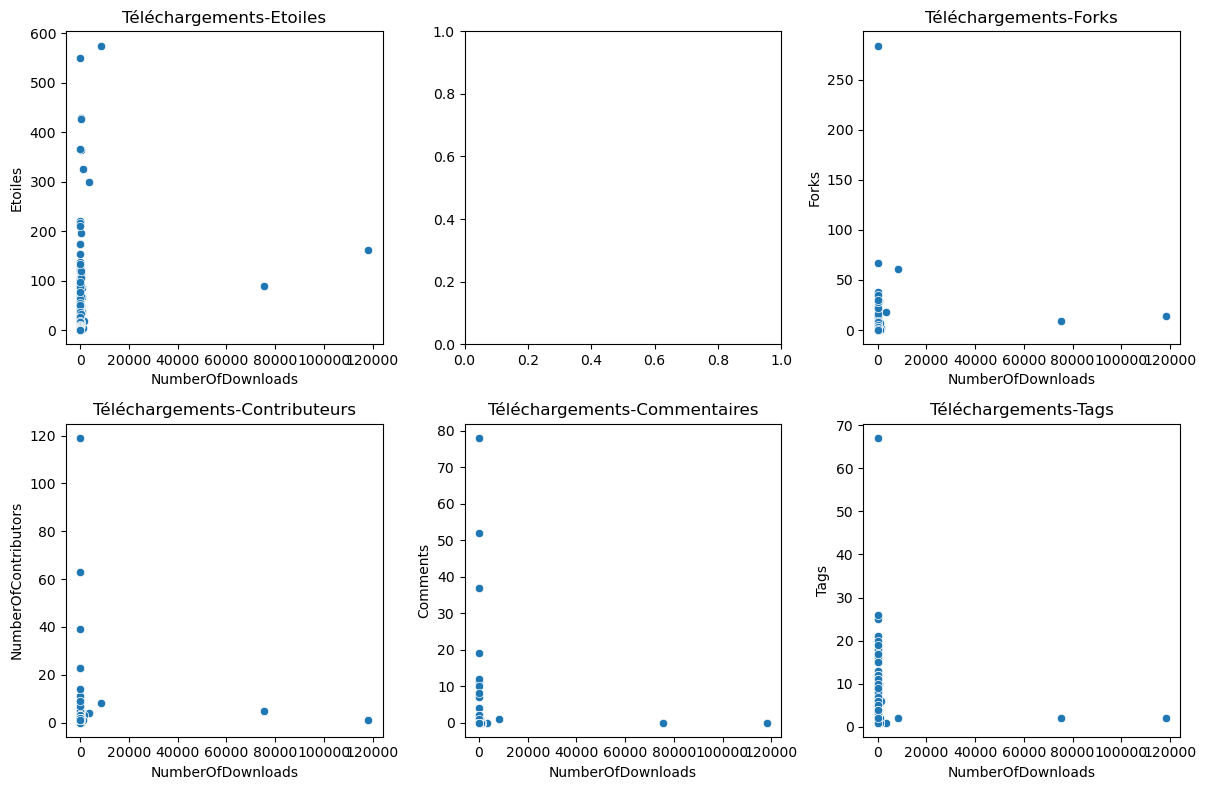

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Données de exemple
NumberOfDownloads = df["NumberOfDownloads"]
Etoiles = df["Etoiles"]
Forks = df["Forks"]
Contributors = df["NumberOfContributors"]
Commentaires = df["Comments"]
Tags= df["Tags"]

# Créer les sous-graphiques
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(12, 8))

# Nuage de points sur le premier sous-graphique
sns.scatterplot(x=NumberOfDownloads, y=Etoiles, ax=ax1)
ax1.set_title('Téléchargements-Etoiles')

# Nuage de points sur le troisième sous-graphique
sns.scatterplot(x=NumberOfDownloads, y=Forks, ax=ax3)
ax3.set_title('Téléchargements-Forks')

# Nuage de points sur le quatrième sous-graphique
sns.scatterplot(x=NumberOfDownloads, y=Contributors, ax=ax4)
ax4.set_title('Téléchargements-Contributeurs')

# Nuage de points sur le cinquième sous-graphique
sns.scatterplot(x=NumberOfDownloads, y=Commentaires, ax=ax5)
ax5.set_title('Téléchargements-Commentaires')

# Nuage de points sur le sixième sous-graphique
sns.scatterplot(x=NumberOfDownloads, y=Tags, ax=ax6)
ax6.set_title('Téléchargements-Tags')

# Ajuster les espacements entre les sous-graphiques
plt.tight_layout()

# Afficher les graphiques
plt.show()


In [14]:
df.describe()

,Etoiles,PullRequests,Forks,NumberOfDownloads,NumberOfContributors,Comments,Tags
count,12347.000000,12347.000000,12347.000000,740.000000,12347.000000,12347.000000,12347.000000
mean,10.165141,0.156637,1.454847,303.382432,1.715072,0.280230,0.651413
std,90.310443,2.447423,12.403437,5160.553585,10.936704,2.734964,14.410833
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,6.000000,0.000000,1.000000,6.000000,1.000000,0.000000,0.000000
max,7523.000000,203.000000,649.000000,118221.000000,469.000000,140.000000,868.000000


En se référant aux résultats statistiques, il ya des valeurs atypiques et lorsqu'on jette un coup d'oeil aux quartiles, on se rend compte que les trois quartiles pour les colonnes NumberOfContributors, Comments, Tags sont les memes. Ce qui en soi, n'a rien d'illogique. Cela est bien possible. Donc nous allons simplement garder les valeurs telles quelle

In [24]:
# # Gestion des valeurs abérrantes
# # Liste des Langages trouvés pour détecter s'ils sont tous des langages de programmtion

# langages = []
# for i in range(df.shape[0]):
#     if df["Langages"][i] != "No Langage":
#         langages.extend(eval(df["Langages"][i]))
#     else:
#         langages.append("No Langages")

In [23]:
# Gestion des valeurs abérrantes
# Liste des Langages trouvés pour détecter s'ils sont tous des langages de programmtion

from collections import Counter

occurrences = Counter(langages)

for element, count in occurrences.items():
    print(f"{element}: {count}")

Python: 62
JavaScript: 42
Cuda: 3
Shell: 24
C++: 11
C: 10
Jupyter Notebook: 9
No Langages: 31
TypeScript: 16
Rust: 3
Lua: 1
Tcl: 1
Ruby: 4
HTML: 28
CSS: 23
Java: 3
Dockerfile: 10
CMake: 2
Go: 7
Vue: 5
SCSS: 4
Makefile: 12
PHP: 4
Agda: 1
Dart: 2
Swift: 4
Kotlin: 2
Objective-C: 4
Nix: 1
Procfile: 1
Batchfile: 5
AppleScript: 1
Assembly: 2
CUE: 1
C#: 4
Pascal: 1
Logos: 1
Common Lisp: 1
Blade: 2
Processing: 1
HLSL: 1
Julia: 1
Svelte: 2
ASL: 1


Pour les éléements affichés comme langages qui ne le sontpas, nous les conserverons parce qu'ils pourraient nous ssrvir pour détecter les rechnologies tendances ou les plus utilisées

In [25]:
df.drop("NumberOfDownloads", axis=1, inplace=True)
df.head()

,Repository,Sujets,Etoiles,Langages,PullRequests,Forks,NumberOfContributors,Comments,Tags
0,SysCV/sam-hq,"['sam', 'segmentation', 'segment-anything', 'z...",1758.0,['Python'],0.0,56.0,1.0,0.0,0.0
1,Not-Quite-RARBG/main,"['rarbg', 'torrent', 'torrents']",610.0,['JavaScript'],0.0,21.0,7.0,1.0,0.0
2,mit-han-lab/llm-awq,No Topic,354.0,"['Python', 'Cuda', 'Shell', 'C++', 'C']",0.0,24.0,3.0,0.0,0.0
3,KasperskyLab/triangle_check,No Topic,299.0,['Python'],0.0,18.0,4.0,0.0,1.0
4,damo-vilab/videocomposer,No Topic,229.0,"['Python', 'Shell']",0.0,6.0,2.0,0.0,0.0


In [26]:
df.shape

(13428, 9)

In [27]:
df.to_csv("data_cleaned.csv")